# Demo 3: Stable Diffusion en vivo con Hugging Face

En esta demo vamos a ver **Stable Diffusion real** en acción usando la librería `diffusers` de Hugging Face.

Este modelo:
- Empieza desde **ruido puro**.
- Usa la **U-Net** para eliminar ruido paso a paso en el **espacio latente**.
- Utiliza un **VAE** para decodificar la imagen final.
- Se guía por un **prompt en texto** (gracias al modelo CLIP).

De esta forma, veremos cómo se genera una imagen a partir de una simple descripción.


In [ ]:
!pip install diffusers transformers accelerate safetensors torch --upgrade --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 87.6 MB/s eta 0:00:00


## Cargar el pipeline de Stable Diffusion

Usaremos el modelo preentrenado `runwayml/stable-diffusion-v1-5`.  
Esto incluye:
- **VAE** (encoder/decoder).
- **U-Net** (elimina ruido paso a paso).
- **CLIP** (convierte texto en vectores).


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Cargar modelo
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")  # mover a GPU


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Primer ejemplo: prompt en texto

Vamos a generar una imagen a partir del prompt:

**"A dog astronaut painted in Van Gogh style"**


  0%|          | 0/20 [00:00<?, ?it/s]

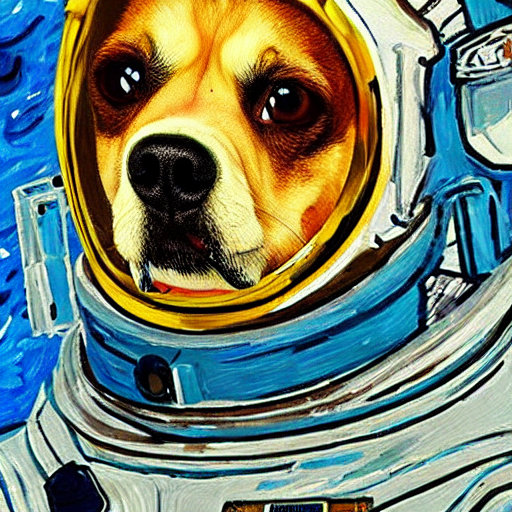

In [ ]:
from IPython.display import display

prompt = "A dog astronaut painted in Van Gogh style"

image = pipe(prompt, num_inference_steps=20, guidance_scale=7.5).images[0]

# Mostrar dentro del notebook
display(image)

# (opcional) Guardar en archivo
image.save("astronaut_dog.png")



## Más ejemplos

Vamos a probar distintos prompts para ver cómo cambia el resultado.


  0%|          | 0/25 [00:00<?, ?it/s]

Prompt: A cyberpunk city at night with neon lights


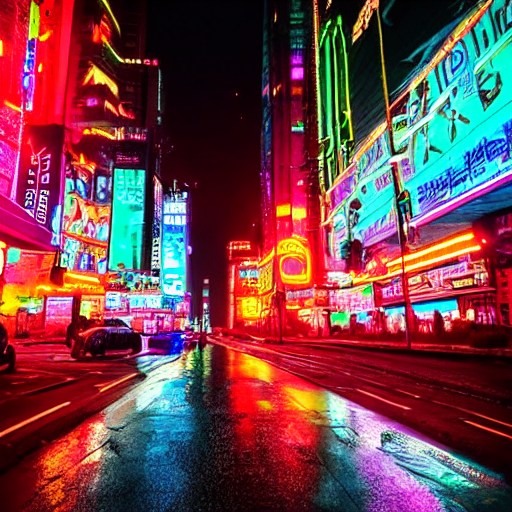

  0%|          | 0/25 [00:00<?, ?it/s]

Prompt: A medieval castle on top of a mountain, cinematic lighting


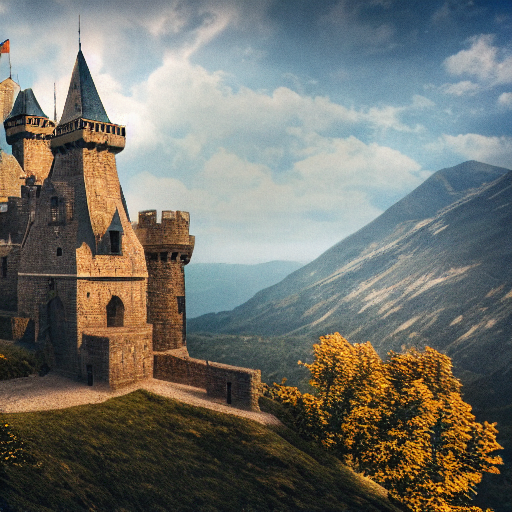

  0%|          | 0/25 [00:00<?, ?it/s]

Prompt: A futuristic sports car in a desert, photorealistic


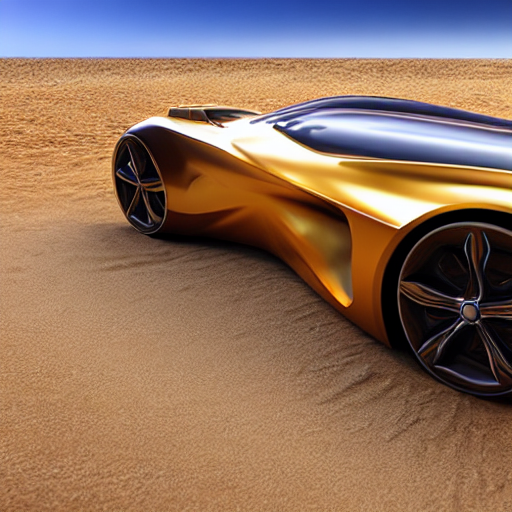

In [ ]:
from IPython.display import display

prompts = [
    "A cyberpunk city at night with neon lights",
    "A medieval castle on top of a mountain, cinematic lighting",
    "A futuristic sports car in a desert, photorealistic"
]

for p in prompts:
    img = pipe(p, num_inference_steps=25, guidance_scale=7.5).images[0]
    print(f"Prompt: {p}")
    display(img)  # mostrar dentro del notebook
    img.save(f"{p[:30].replace(' ', '_')}.png")  # guardar con nombre simplificado



# Conclusión Demo 3

En esta demo vimos cómo Stable Diffusion genera imágenes en vivo:

1. Empieza en **ruido aleatorio**.
2. La **U-Net** predice y elimina ruido en cada paso.
3. Todo ocurre en el **espacio latente**, que hace el proceso eficiente.
4. El **VAE** decodifica la imagen final.
5. El **prompt** en texto guía el resultado gracias a CLIP.

Esto conecta directamente con la teoría que explicamos en la píldora:
- Forward process → ruido.
- Reverse process → limpieza iterativa.
- U-Net + VAE + CLIP → unión de componentes.
